Accessing corpus from prominent NLP packages
- NLTK https://www.nltk.org/
- Spacy https://spacy.io/
- Stanford CoreNLP: https://stanfordnlp.github.io/CoreNLP/

# Corpus

In [1]:
import nltk

Example of corpus in NLTK
- Brown: The Brown Corpus was the first million-word electronic corpus of English
- Gutenberg: contains some 25,000 free electronic books
- Reuters: The Reuters Corpus contains 10,788 news documents totaling 1.3 million words
- Inaugural Address: 

### Brown Corpus
The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on.  
Good for studying systematic difference between genres.  

For a complete list of text in the corpus see http://icame.uib.no/brown/bcm-los.html.

In [2]:
from nltk.corpus import brown

In [3]:
# Print the list of categories in the brown corpus
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Access the corpus as a list of words, or a list of sentences (where each sentence is itself just a list of words). 
We can optionally specify particular categories or files to read:

In [4]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [5]:
brown.words(categories='science_fiction')

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

In [6]:
brown.fileids()[:10]

['ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'ca06',
 'ca07',
 'ca08',
 'ca09',
 'ca10']

In [7]:
brown.words(fileids=['ca10'])

['Vincent', 'G.', 'Ierulli', 'has', 'been', ...]

In [8]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

Let's compare genres in their usage of modal verbs. The first step is to produce the counts for a particular genre. Remember to import nltk before doing the following

In [9]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['what', 'when', 'where','can', 'could', 'may', 'might', 'must', 'will']

In [10]:
print("Number of occurances ")
for m in modals:
    print(m + ':', fdist[m])

Number of occurances 
what: 95
when: 169
where: 59
can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


#### Counts for each genre of interest

In [11]:
cfd = nltk.ConditionalFreqDist((genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
                              )
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
cfd.tabulate(conditions=genres, samples=modals)

                 what  when where   can could   may might  must  will 
           news    76   128    58    93    86    66    38    50   389 
       religion    64    53    20    82    59    78    12    54    71 
        hobbies    78   119    72   268    58   131    22    83   264 
science_fiction    27    21    10    16    49     4    12     8    16 
        romance   121   126    54    74   193    11    51    45    43 
          humor    36    52    15    16    30     8     8     9    13 


Observe that the most frequent modal in the 
- news genre is _will_
- romance genre is _could_
- hobbies genre _can_ and _will_

#### Counting Words by Genre

In [12]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
               for word in brown.words(categories=genre)
)

In [13]:
genre_word = [(genre, word)
               for genre in ['news', 'romance']
                   for word in brown.words(categories=genre)
             ]
len(genre_word)

170576

In [14]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [15]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [16]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

In [17]:
cfd['romance']['could']

193

### Corpora in Other Languages
NLTK also contains corpus from other languages

In [18]:
# Spanish
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [19]:
# Hindu 
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [20]:
from nltk.corpus import udhr
import pandas as pd
import matplotlib.pyplot as plt

languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word)) 
                               for lang in languages
                                   for word in udhr.words(lang + '-Latin1')
                              )

In [21]:
def plot_freq(lang):
    max_length = max([len(word) for word in udhr.words(lang + '-Latin1')])
    eng_freq_dist = {}

    for i in range(max_length + 1):
        eng_freq_dist[i] = cfd[lang].freq(i)

    ed = pd.Series(eng_freq_dist, name=lang)
    ed.cumsum().plot(legend=True, title='Cumulative Distribution of Word Lengths')

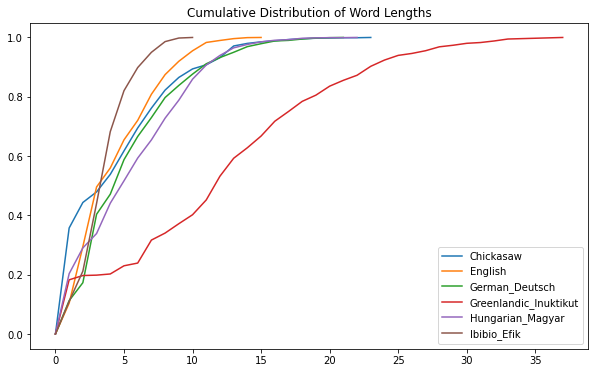

In [22]:
plt.subplots(figsize=(10, 6))
for lang in languages:
    plot_freq(lang)

Plot showing that words having 5 or fewer letters account for about 
- 80% of Ibibio text, 
- 60% of German text, 
- 25% of Inuktitut text

### Loading your own Corpus

In [23]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'data/'
wordlists = PlaintextCorpusReader(corpus_root, '.*')

In [24]:
wordlists.fileids()

['a.txt', 'b.txt']

In [25]:
wordlists.words('b.txt')

['The', 'Project', 'Gutenberg', 'eBook', 'of', ...]

# Tokenization
To illustrate tokenization we will use the spacy package

The simplest way to tokenize a sentence is to use whitespaces within a string as the delimiter of words. We can do this using the python string ***split()*** method

In [26]:
sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
sentence.split()

['Monticello',
 "wasn't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'Heritage',
 'Site',
 'until',
 '1987.']

In [27]:
# tokenizer: builtin split function
token_sequence = sentence.split()

# list all unique token in your vocabulary sorted lexicographically
vocab = sorted(set(token_sequence))
print(vocab)

['1987.', 'Heritage', 'Monticello', 'Site', 'UNESCO', 'World', 'as', 'designated', 'until', "wasn't"]


#### Tokenization with Regular expression

In [28]:
import re
sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
tokens = re.split(r'[-\s.,;!?]+', sentence)
print(tokens)

['Monticello', "wasn't", 'designated', 'as', 'UNESCO', 'World', 'Heritage', 'Site', 'until', '1987', '']


the regular expression is a sligh improvement of the whitespace method becuase it can handle punctuations

### 3.2.3. Automatic Tokenization

Most often in NLP, other characters besides whitespaces are used to separate words in a sentence/document. An efficient tokenizer should handle whitespaces as well as punctuations such as commas, periods, quotes, semicolons, and even hyphens (dashes). In some cases, it is relevant to treat punctuation marks as independent words or tokens, while in others they are ignored.

Tokenization can easily become complex. In one case, you might want to split based on periods, but only if the period isn’t followed by a number, to avoid splitting decimals. In another case, you might not want to split after a period that is part of “smiley” emoticon symbol, such as in a Twitter message.

Several Python libraries implement tokenizers, each with its advantages and disadvantages: 
- spaCy—Accurate , flexible, fast, Python
- Stanford CoreNLP—More accurate, less flexible, fast, depends on Java 8
- NLTK—Standard used by many NLP contests and comparisons, popular, Python

NLTK and Stanford CoreNLP have been around the longest and are the most widely used. 

#### 3.2.3.1. NLTK RegexpTokenizer
Natural Language Toolkit (NLTK) tokenizer function *RegexpTokenizer* to identify all tokens in or sentence.  
This nltk.RegexpTokenizer is better than the python string split function and the regular expressions used previously because it ignores whitespace tokens. It also separates sentence-ending trailing punctuation from tokens that do not contain any other punctuation character

In [29]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')
vocab = tokenizer.tokenize(sentence)
print(vocab)

['Monticello', 'wasn', "'t", 'designated', 'as', 'UNESCO', 'World', 'Heritage', 'Site', 'until', '1987', '.']


#### 3.2.3.2. NLTK TreebankWordTokenizer  
A more efficient tokenizer from the NLTK package is the Treebank Word Tokenizer. It incorporates a variety of common rules for English word tokenization. For example, it separates phrase-terminating punctuation (?!.;,) from adjacent tokens and retains decimal numbers containing a period as a single token.

In [30]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize(sentence))

['Monticello', 'was', "n't", 'designated', 'as', 'UNESCO', 'World', 'Heritage', 'Site', 'until', '1987', '.']


The Treebank Word Tokenizer contains rules for English contractions. For example *“wasn’t”* is tokenized as *["was", "n’t"]*.

In [31]:
import spacy
# load the spaCy language model
sp = spacy.load('en_core_web_sm')

SpaCy automatically breaks your document into tokens when a document is created using the model.  
A token simply refers to an individual part of a sentence having some semantic value. Let's see what tokens we have in our document

In [32]:
spacy_sentence = sp(sentence)
tokens = []
for word in spacy_sentence:
    tokens.append(word)
    
print(tokens)

[Monticello, was, n't, designated, as, UNESCO, World, Heritage, Site, until, 1987, .]


# Stemming and Lemmatization

### Stemming
Most stemming algorithms use a crude heuristic process that chops off the ends of words in the hope of correctly transforming words into their root form. So the words “trouble”, “troubled” and “troubles” might be converted to "troubl" instead of trouble. 

**Common Stemming algorithms**

1) **Porter’s Stemmer**

In [33]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

sentence_list = ["This", "sentence", "was", "transformed", "using", "a", "Stemmer"]
print (" ".join([stemmer.stem(word) for word in sentence_list]))

thi sentenc wa transform use a stemmer


2) **Snowball Stemmer**  
The SnowballStemmer is an improvement of the Porter's Stemmer and provided the best result.  

In [34]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')
sentence_list = ["This", "sentence", "was", "transformed", "using", "a", "Stemmer"]

print (" ".join([stemmer.stem(word) for word in sentence_list]))

this sentenc was transform use a stemmer


3) **Lancaster Stemmer**

In [35]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

sentence_list = ["This", "sentence", "was", "transformed", "using", "a", "Stemmer"]
print (" ".join([stemmer.stem(word) for word in sentence_list]))

thi sent was transform us a stem


**Limitations of  Stemming:** 

There are two msin limitations of stemming
1) Over-stemming: occurs when two words are stemmed from the same root that are of different stems. Over-stemming can also be regarded as false-positives.  
2) Under-stemming: occurs when two words are stemmed from the same root that are not of different stems. Under-stemming can be interpreted as false-negatives. 

### Lemmatization  
Lemmatization is the algorithmic process of finding the lemma of a word depending on their meaning. Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings. It helps in returning the base or dictionary form of a word, which is known as the lemma. 

Stemming algorithm works by cutting the suffix from the word. In a broader sense cuts either the beginning or end of the word. On the contrary, Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms. In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word. Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be looked in the dictionary. Hence, lemmatization helps in forming better machine learning features.  

Lemmatizer minimizes text ambiguity. Example words like bicycle or bicycles are converted to base word bicycle. Basically, it will convert all words having the same meaning but different representation to their base form. It reduces the word density in the given text and helps in preparing the accurate features for training machine. Cleaner the data, the more intelligent and accurate your machine learning model, will be. Lemmatizerwill also saves memory as well as computational cost. 

In [36]:
from nltk.stem import WordNetLemmatizer

sentence_list = ["This","sentence","was","transformed", "using", "WordNet", "Lemmatizer"]

# initialize class
lemmatizer = WordNetLemmatizer()
print (" ".join([lemmatizer.lemmatize(word) for word in sentence_list]))

This sentence wa transformed using WordNet Lemmatizer


#### Spacy lematization
Spacy also automatically perform lematization

In [37]:
import spacy
sp = spacy.load('en_core_web_sm')

sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
sentence = "This sentence was transformed using WordNet Lemmatizer"
spacy_sentence = sp(sentence)
for word in spacy_sentence:
    print(word.text, " => ", word.lemma_)

This  =>  this
sentence  =>  sentence
was  =>  be
transformed  =>  transform
using  =>  use
WordNet  =>  WordNet
Lemmatizer  =>  Lemmatizer


## Sentence Segmentation

In [38]:
## using a simple rule-based segmenter with native python code
def sentence_segmenter(text):
    current_position = 0
    cursor = 0
    sentences = []
    for c in text:
        if c == "." or c == "!" or c == "?":
            sentences.append(text[current_position:cursor+1])
            current_position = cursor + 2
        cursor+=1
        
    return sentences


In [39]:
text1 = "We need to get better, simple as that! We've done really well this season coming through. The start was difficult. We had no preseason and lost three of the first six."
sentences1 = sentence_segmenter(text1)
for sen in sentences1:
    print(sen)

We need to get better, simple as that!
We've done really well this season coming through.
The start was difficult.
We had no preseason and lost three of the first six.


Our sentence segmenter only segments sentences when it meets a sentence boundary which in this case is either a "." or a "!".  
- If we change a single sentence and add say a "?" or abbreviations the sign our code will miss one of the sentences

In [40]:
text2 = "We need to get better, simple as that! We've done really well this season coming through. The start was difficult in D.C.? We had no preseason and lost three of the first six."
sentences2 = sentence_segmenter(text2)
for sen in sentences2:
    print(sen)

We need to get better, simple as that!
We've done really well this season coming through.
The start was difficult in D.
.

We had no preseason and lost three of the first six.


### Spacy sentence segmentation

In [41]:
spacy_sentence1 = sp(text1)
for sent in spacy_sentence1.sents:
    print(sent.text)

We need to get better, simple as that!
We've done really well this season coming through.
The start was difficult.
We had no preseason and lost three of the first six.


In [42]:
spacy_sentence2 = sp(text2)
for sent in spacy_sentence2.sents:
    print(sent.text)

We need to get better, simple as that!
We've done really well this season coming through.
The start was difficult in D.C.?
We had no preseason and lost three of the first six.


# Vocabulary

Use the code below to scrape the wikipedia page of the president of Senegal.  
**Task:** 
1) Process the document and create a vocabulary  
2) Perform exploratory analysis on the vocabulary  

In [43]:
import bs4 as bs
import urllib

# link to the wikipedia of the president Senegal
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Macky_Sall')  
raw_html = raw_html.read()

wiki_html = bs.BeautifulSoup(raw_html, 'lxml')
article_paragraphs = wiki_html.find_all('p')
article_text = ''
for para in article_paragraphs:  
    article_text += para.text